In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [21]:
df = pd.read_csv('C:/Users/Achraf Said/Desktop/dataset/bread basket.csv')

In [22]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [6]:
#df.describe()

In [23]:
# Converting the 'date_time' column into the right format
df['date_time'] = pd.to_datetime(df['date_time'])

In [8]:
#df.head(10)

In [24]:
df['Transaction'].nunique()

9465

In [26]:
# Extracting date
df['date'] = df['date_time'].dt.date

#Extracting time
df['time'] = df['date_time'].dt.time
# Extracting month and replacing it with text
# Extracting month and replacing it with text
df['month'] = df['date_time'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

# Extracting hour
df['hour'] = df['date_time'].dt.hour
# Replacing hours with text
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

# Extracting weekday and replacing it with text
df['weekday'] = df['date_time'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# dropping date_time column
df.drop('date_time', axis = 1, inplace = True)

In [27]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [28]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

In [29]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


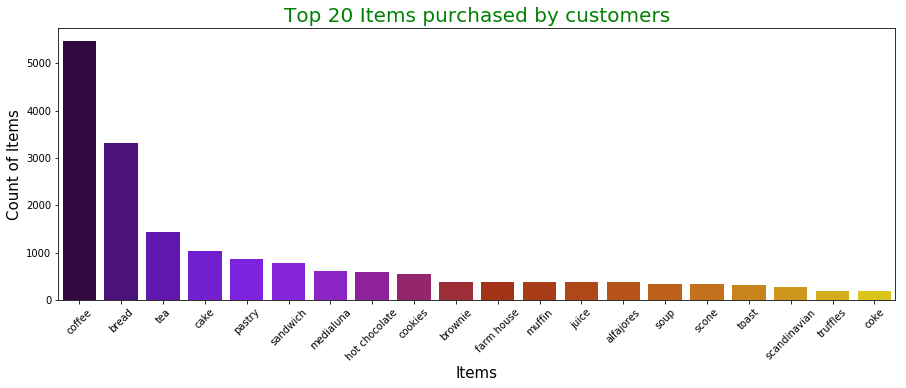

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

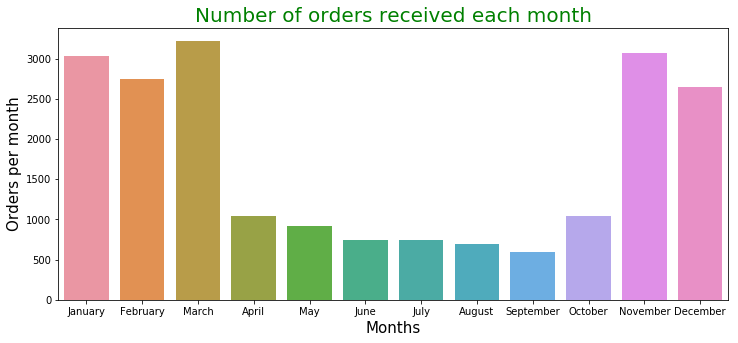

In [41]:
monthTran = df.groupby('month')['Transaction'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()


plt.show()

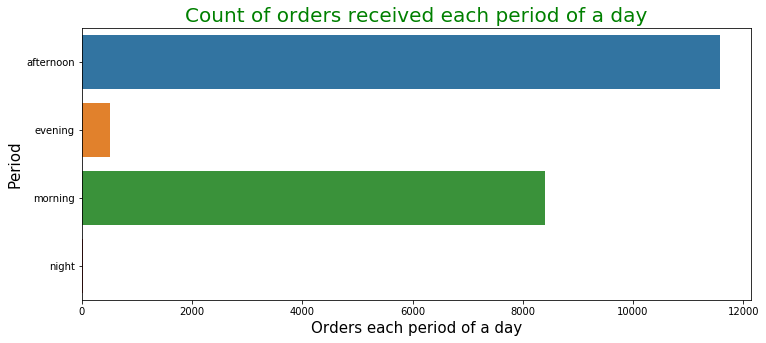

In [42]:
dayTran = df.groupby('period_day')['Transaction'].count().reset_index()
# dayTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
# dayTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = dayTran, x = "Transaction", y = "period_day")
plt.ylabel('Period', size = 15)
plt.xlabel('Orders each period of a day', size = 15)
plt.title('Count of orders received each period of a day', color = 'green', size = 20)
plt.show()

In [47]:
#Association_rules

# Sebastian Raschka 2014-2020
# mlxtend Machine Learning Library Extensions
#
# Function for generating association rules
#
# Author: Joshua Goerner <https://github.com/JoshuaGoerner>
#         Sebastian Raschka <sebastianraschka.com>
#
# License: BSD 3 clause

from itertools import combinations
import numpy as np
import pandas as pd


def association_rules(df, metric="confidence",
                      min_threshold=0.8, support_only=False):
    """Generates a DataFrame of association rules including the
    metrics 'score', 'confidence', and 'lift'

    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame of frequent itemsets
      with columns ['support', 'itemsets']

    metric : string (default: 'confidence')
      Metric to evaluate if a rule is of interest.
      **Automatically set to 'support' if `support_only=True`.**
      Otherwise, supported metrics are 'support', 'confidence', 'lift',
      'leverage', and 'conviction'
      These metrics are computed as follows:

      - support(A->C) = support(A+C) [aka 'support'], range: [0, 1]\n
      - confidence(A->C) = support(A+C) / support(A), range: [0, 1]\n
      - lift(A->C) = confidence(A->C) / support(C), range: [0, inf]\n
      - leverage(A->C) = support(A->C) - support(A)*support(C),
        range: [-1, 1]\n
      - conviction = [1 - support(C)] / [1 - confidence(A->C)],
        range: [0, inf]\n

    min_threshold : float (default: 0.8)
      Minimal threshold for the evaluation metric,
      via the `metric` parameter,
      to decide whether a candidate rule is of interest.

    support_only : bool (default: False)
      Only computes the rule support and fills the other
      metric columns with NaNs. This is useful if:

      a) the input DataFrame is incomplete, e.g., does
      not contain support values for all rule antecedents
      and consequents

      b) you simply want to speed up the computation because
      you don't need the other metrics.

    Returns
    ----------
    pandas DataFrame with columns "antecedents" and "consequents"
      that store itemsets, plus the scoring metric columns:
      "antecedent support", "consequent support",
      "support", "confidence", "lift",
      "leverage", "conviction"
      of all rules for which
      metric(rule) >= min_threshold.
      Each entry in the "antecedents" and "consequents" columns are
      of type `frozenset`, which is a Python built-in type that
      behaves similarly to sets except that it is immutable
      (For more info, see
      https://docs.python.org/3.6/library/stdtypes.html#frozenset).

    Examples
    -----------
    For usage examples, please see
    http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

    """

    # check for mandatory columns
    if not all(col in df.columns for col in ["support", "itemsets"]):
        raise ValueError("Dataframe needs to contain the\
                         columns 'support' and 'itemsets'")

    def conviction_helper(sAC, sA, sC):
        confidence = sAC/sA
        conviction = np.empty(confidence.shape, dtype=float)
        if not len(conviction.shape):
            conviction = conviction[np.newaxis]
            confidence = confidence[np.newaxis]
            sAC = sAC[np.newaxis]
            sA = sA[np.newaxis]
            sC = sC[np.newaxis]
        conviction[:] = np.inf
        conviction[confidence < 1.] = ((1. - sC[confidence < 1.]) /
                                       (1. - confidence[confidence < 1.]))

        return conviction

    # metrics for association rules
    metric_dict = {
        "antecedent support": lambda _, sA, __: sA,
        "consequent support": lambda _, __, sC: sC,
        "support": lambda sAC, _, __: sAC,
        "confidence": lambda sAC, sA, _: sAC/sA,
        "lift": lambda sAC, sA, sC: metric_dict["confidence"](sAC, sA, sC)/sC,
        "leverage": lambda sAC, sA, sC: metric_dict["support"](
             sAC, sA, sC) - sA*sC,
        "conviction": lambda sAC, sA, sC: conviction_helper(sAC, sA, sC)
        }

    columns_ordered = ["antecedent support", "consequent support",
                       "support",
                       "confidence", "lift",
                       "leverage", "conviction"]

    # check for metric compliance
    if support_only:
        metric = 'support'
    else:
        if metric not in metric_dict.keys():
            raise ValueError("Metric must be 'confidence' or 'lift', got '{}'"
                             .format(metric))

    # get dict of {frequent itemset} -> support
    keys = df['itemsets'].values
    values = df['support'].values
    frozenset_vect = np.vectorize(lambda x: frozenset(x))
    frequent_items_dict = dict(zip(frozenset_vect(keys), values))

    # prepare buckets to collect frequent rules
    rule_antecedents = []
    rule_consequents = []
    rule_supports = []

    # iterate over all frequent itemsets
    for k in frequent_items_dict.keys():
        sAC = frequent_items_dict[k]
        # to find all possible combinations
        for idx in range(len(k)-1, 0, -1):
            # of antecedent and consequent
            for c in combinations(k, r=idx):
                antecedent = frozenset(c)
                consequent = k.difference(antecedent)

                if support_only:
                    # support doesn't need these,
                    # hence, placeholders should suffice
                    sA = None
                    sC = None

                else:
                    try:
                        sA = frequent_items_dict[antecedent]
                        sC = frequent_items_dict[consequent]
                    except KeyError as e:
                        s = (str(e) + 'You are likely getting this error'
                                      ' because the DataFrame is missing '
                                      ' antecedent and/or consequent '
                                      ' information.'
                                      ' You can try using the '
                                      ' `support_only=True` option')
                        raise KeyError(s)
                    # check for the threshold

                score = metric_dict[metric](sAC, sA, sC)
                if score >= min_threshold:
                    rule_antecedents.append(antecedent)
                    rule_consequents.append(consequent)
                    rule_supports.append([sAC, sA, sC])

    # check if frequent rule was generated
    if not rule_supports:
        return pd.DataFrame(
            columns=["antecedents", "consequents"] + columns_ordered)

    else:
        # generate metrics
        rule_supports = np.array(rule_supports).T.astype(float)
        df_res = pd.DataFrame(
            data=list(zip(rule_antecedents, rule_consequents)),
            columns=["antecedents", "consequents"])

        if support_only:
            sAC = rule_supports[0]
            for m in columns_ordered:
                df_res[m] = np.nan
            df_res['support'] = sAC

        else:
            sAC = rule_supports[0]
            sA = rule_supports[1]
            sC = rule_supports[2]
            for m in columns_ordered:
                df_res[m] = metric_dict[m](sAC, sA, sC)

        return df_res


In [48]:
#fpcommon

import numpy as np
import pandas as pd
import collections

from pandas import __version__ as pandas_version


def setup_fptree(df, min_support):
    num_itemsets = len(df.index)        # number of itemsets in the database

    is_sparse = False
    if hasattr(df, "sparse"):
        # DataFrame with SparseArray (pandas >= 0.24)
        if df.size == 0:
            itemsets = df.values
        else:
            itemsets = df.sparse.to_coo().tocsr()
            is_sparse = True
    else:
        # dense DataFrame
        itemsets = df.values

    # support of each individual item
    # if itemsets is sparse, np.sum returns an np.matrix of shape (1, N)
    item_support = np.array(np.sum(itemsets, axis=0) / float(num_itemsets))
    item_support = item_support.reshape(-1)

    items = np.nonzero(item_support >= min_support)[0]

    # Define ordering on items for inserting into FPTree
    indices = item_support[items].argsort()
    rank = {item: i for i, item in enumerate(items[indices])}

    if is_sparse:
        # Ensure that there are no zeros in sparse DataFrame
        itemsets.eliminate_zeros()

    # Building tree by inserting itemsets in sorted order
    # Heuristic for reducing tree size is inserting in order
    #   of most frequent to least frequent
    tree = FPTree(rank)
    for i in range(num_itemsets):
        if is_sparse:
            # itemsets has been converted to CSR format to speed-up the line
            # below.  It has 3 attributes:
            #  - itemsets.data contains non null values, shape(#nnz,)
            #  - itemsets.indices contains the column number of non null
            #    elements, shape(#nnz,)
            #  - itemsets.indptr[i] contains the offset in itemset.indices of
            #    the first non null element in row i, shape(1+#nrows,)
            nonnull = itemsets.indices[itemsets.indptr[i]:itemsets.indptr[i+1]]
        else:
            nonnull = np.where(itemsets[i, :])[0]
        itemset = [item for item in nonnull if item in rank]
        itemset.sort(key=rank.get, reverse=True)
        tree.insert_itemset(itemset)

    return tree, rank


def generate_itemsets(generator, num_itemsets, colname_map):
    itemsets = []
    supports = []
    for sup, iset in generator:
        itemsets.append(frozenset(iset))
        supports.append(sup / num_itemsets)

    res_df = pd.DataFrame({'support': supports, 'itemsets': itemsets})

    if colname_map is not None:
        res_df['itemsets'] = res_df['itemsets'] \
            .apply(lambda x: frozenset([colname_map[i] for i in x]))

    return res_df


def valid_input_check(df):

    if f"{type(df)}" == "<class 'pandas.core.frame.SparseDataFrame'>":
        msg = ("SparseDataFrame support has been deprecated in pandas 1.0,"
               " and is no longer supported in mlxtend. "
               " Please"
               " see the pandas migration guide at"
               " https://pandas.pydata.org/pandas-docs/"
               "stable/user_guide/sparse.html#sparse-data-structures"
               " for supporting sparse data in DataFrames.")
        raise TypeError(msg)

    if df.size == 0:
        return
    if hasattr(df, "sparse"):
        if not isinstance(df.columns[0], str) and df.columns[0] != 0:
            raise ValueError('Due to current limitations in Pandas, '
                             'if the sparse format has integer column names,'
                             'names, please make sure they either start '
                             'with `0` or cast them as string column names: '
                             '`df.columns = [str(i) for i in df.columns`].')

    # Fast path: if all columns are boolean, there is nothing to checks
    all_bools = df.dtypes.apply(pd.api.types.is_bool_dtype).all()
    if not all_bools:
        # Pandas is much slower than numpy, so use np.where on Numpy arrays
        if hasattr(df, "sparse"):
            if df.size == 0:
                values = df.values
            else:
                values = df.sparse.to_coo().tocoo().data
        else:
            values = df.values
        idxs = np.where((values != 1) & (values != 0))
        if len(idxs[0]) > 0:
            # idxs has 1 dimension with sparse data and 2 with dense data
            val = values[tuple(loc[0] for loc in idxs)]
            s = ('The allowed values for a DataFrame'
                 ' are True, False, 0, 1. Found value %s' % (val))
            raise ValueError(s)


class FPTree(object):
    def __init__(self, rank=None):
        self.root = FPNode(None)
        self.nodes = collections.defaultdict(list)
        self.cond_items = []
        self.rank = rank

    def conditional_tree(self, cond_item, minsup):
        """
        Creates and returns the subtree of self conditioned on cond_item.

        Parameters
        ----------
        cond_item : int | str
            Item that the tree (self) will be conditioned on.
        minsup : int
            Minimum support threshold.

        Returns
        -------
        cond_tree : FPtree
        """
        # Find all path from root node to nodes for item
        branches = []
        count = collections.defaultdict(int)
        for node in self.nodes[cond_item]:
            branch = node.itempath_from_root()
            branches.append(branch)
            for item in branch:
                count[item] += node.count

        # Define new ordering or deep trees may have combinatorially explosion
        items = [item for item in count if count[item] >= minsup]
        items.sort(key=count.get)
        rank = {item: i for i, item in enumerate(items)}

        # Create conditional tree
        cond_tree = FPTree(rank)
        for idx, branch in enumerate(branches):
            branch = sorted([i for i in branch if i in rank],
                            key=rank.get, reverse=True)
            cond_tree.insert_itemset(branch, self.nodes[cond_item][idx].count)
        cond_tree.cond_items = self.cond_items + [cond_item]

        return cond_tree

    def insert_itemset(self, itemset, count=1):
        """
        Inserts a list of items into the tree.

        Parameters
        ----------
        itemset : list
            Items that will be inserted into the tree.
        count : int
            The number of occurrences of the itemset.
        """
        self.root.count += count

        if len(itemset) == 0:
            return

        # Follow existing path in tree as long as possible
        index = 0
        node = self.root
        for item in itemset:
            if item in node.children:
                child = node.children[item]
                child.count += count
                node = child
                index += 1
            else:
                break

        # Insert any remaining items
        for item in itemset[index:]:
            child_node = FPNode(item, count, node)
            self.nodes[item].append(child_node)
            node = child_node

    def is_path(self):
        if len(self.root.children) > 1:
            return False
        for i in self.nodes:
            if len(self.nodes[i]) > 1 or len(self.nodes[i][0].children) > 1:
                return False
        return True

    def print_status(self, count, colnames):
        cond_items = [str(i) for i in self.cond_items]
        if colnames:
            cond_items = [str(colnames[i]) for i in self.cond_items]
        cond_items = ", ".join(cond_items)
        print('\r%d itemset(s) from tree conditioned on items (%s)' %
              (count, cond_items), end="\n")


class FPNode(object):
    def __init__(self, item, count=0, parent=None):
        self.item = item
        self.count = count
        self.parent = parent
        self.children = collections.defaultdict(FPNode)

        if parent is not None:
            parent.children[item] = self

    def itempath_from_root(self):
        """ Returns the top-down sequence of items from self to
            (but not including) the root node. """
        path = []
        if self.item is None:
            return path

        node = self.parent
        while node.item is not None:
            path.append(node.item)
            node = node.parent

        path.reverse()
        return path

In [54]:
#apriori

import numpy as np
import pandas as pd
#from ..frequent_patterns import fpcommon as fpc


def generate_new_combinations(old_combinations):
    """
    Generator of all combinations based on the last state of Apriori algorithm
    Parameters
    -----------
    old_combinations: np.array
        All combinations with enough support in the last step
        Combinations are represented by a matrix.
        Number of columns is equal to the combination size
        of the previous step.
        Each row represents one combination
        and contains item type ids in the ascending order
        ```
               0        1
        0      15       20
        1      15       22
        2      17       19
        ```

    Returns
    -----------
    Generator of all combinations from the last step x items
    from the previous step.

    Examples
    -----------
    For usage examples, please see
    http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori

    """

    items_types_in_previous_step = np.unique(old_combinations.flatten())
    for old_combination in old_combinations:
        max_combination = old_combination[-1]
        mask = items_types_in_previous_step > max_combination
        valid_items = items_types_in_previous_step[mask]
        old_tuple = tuple(old_combination)
        for item in valid_items:
            yield from old_tuple
            yield item


def generate_new_combinations_low_memory(old_combinations, X, min_support,
                                         is_sparse):
    """
    Generator of all combinations based on the last state of Apriori algorithm
    Parameters
    -----------
    old_combinations: np.array
        All combinations with enough support in the last step
        Combinations are represented by a matrix.
        Number of columns is equal to the combination size
        of the previous step.
        Each row represents one combination
        and contains item type ids in the ascending order
        ```
               0        1
        0      15       20
        1      15       22
        2      17       19
        ```

    X: np.array or scipy sparse matrix
      The allowed values are either 0/1 or True/False.
      For example,

    ```
        0     True False  True  True False  True
        1     True False  True False False  True
        2     True False  True False False False
        3     True  True False False False False
        4    False False  True  True  True  True
        5    False False  True False  True  True
        6    False False  True False  True False
        7     True  True False False False False
    ```

    min_support : float (default: 0.5)
      A float between 0 and 1 for minumum support of the itemsets returned.
      The support is computed as the fraction
      `transactions_where_item(s)_occur / total_transactions`.

    is_sparse : bool True if X is sparse

    Returns
    -----------
    Generator of all combinations from the last step x items
    from the previous step. Every combination contains the
    number of transactions where this item occurs, followed
    by item type ids in the ascending order.
    No combination other than generated
    do not have a chance to get enough support

    Examples
    -----------
    For usage examples, please see
    http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/generate_new_combinations/

    """

    items_types_in_previous_step = np.unique(old_combinations.flatten())
    rows_count = X.shape[0]
    threshold = min_support * rows_count
    for old_combination in old_combinations:
        max_combination = old_combination[-1]
        mask = items_types_in_previous_step > max_combination
        valid_items = items_types_in_previous_step[mask]
        old_tuple = tuple(old_combination)
        if is_sparse:
            mask_rows = X[:, old_tuple].toarray().all(axis=1)
            X_cols = X[:, valid_items].toarray()
            supports = X_cols[mask_rows].sum(axis=0)
        else:
            mask_rows = X[:, old_tuple].all(axis=1)
            supports = X[mask_rows][:, valid_items].sum(axis=0)
        valid_indices = (supports >= threshold).nonzero()[0]
        for index in valid_indices:
            yield supports[index]
            yield from old_tuple
            yield valid_items[index]


def apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0,
            low_memory=False):
    """Get frequent itemsets from a one-hot DataFrame

    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame the encoded format. Also supports
      DataFrames with sparse data; for more info, please
      see (https://pandas.pydata.org/pandas-docs/stable/
           user_guide/sparse.html#sparse-data-structures)

      Please note that the old pandas SparseDataFrame format
      is no longer supported in mlxtend >= 0.17.2.

      The allowed values are either 0/1 or True/False.
      For example,

    ```
             Apple  Bananas   Beer  Chicken   Milk   Rice
        0     True    False   True     True  False   True
        1     True    False   True    False  False   True
        2     True    False   True    False  False  False
        3     True     True  False    False  False  False
        4    False    False   True     True   True   True
        5    False    False   True    False   True   True
        6    False    False   True    False   True  False
        7     True     True  False    False  False  False
    ```

    min_support : float (default: 0.5)
      A float between 0 and 1 for minumum support of the itemsets returned.
      The support is computed as the fraction
      `transactions_where_item(s)_occur / total_transactions`.

    use_colnames : bool (default: False)
      If `True`, uses the DataFrames' column names in the returned DataFrame
      instead of column indices.

    max_len : int (default: None)
      Maximum length of the itemsets generated. If `None` (default) all
      possible itemsets lengths (under the apriori condition) are evaluated.

    verbose : int (default: 0)
      Shows the number of iterations if >= 1 and `low_memory` is `True`. If
      >=1 and `low_memory` is `False`, shows the number of combinations.

    low_memory : bool (default: False)
      If `True`, uses an iterator to search for combinations above
      `min_support`.
      Note that while `low_memory=True` should only be used for large dataset
      if memory resources are limited, because this implementation is approx.
      3-6x slower than the default.


    Returns
    -----------
    pandas DataFrame with columns ['support', 'itemsets'] of all itemsets
      that are >= `min_support` and < than `max_len`
      (if `max_len` is not None).
      Each itemset in the 'itemsets' column is of type `frozenset`,
      which is a Python built-in type that behaves similarly to
      sets except that it is immutable
      (For more info, see
      https://docs.python.org/3.6/library/stdtypes.html#frozenset).

    Examples
    -----------
    For usage examples, please see
    http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

    """

    def _support(_x, _n_rows, _is_sparse):
        """DRY private method to calculate support as the
        row-wise sum of values / number of rows

        Parameters
        -----------

        _x : matrix of bools or binary

        _n_rows : numeric, number of rows in _x

        _is_sparse : bool True if _x is sparse

        Returns
        -----------
        np.array, shape = (n_rows, )

        Examples
        -----------
        For usage examples, please see
        http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

        """
        out = (np.sum(_x, axis=0) / _n_rows)
        return np.array(out).reshape(-1)

    if min_support <= 0.:
        raise ValueError('`min_support` must be a positive '
                         'number within the interval `(0, 1]`. '
                         'Got %s.' % min_support)

    valid_input_check(df)

    if hasattr(df, "sparse"):
        # DataFrame with SparseArray (pandas >= 0.24)
        if df.size == 0:
            X = df.values
        else:
            X = df.sparse.to_coo().tocsc()
        is_sparse = True
    else:
        # dense DataFrame
        X = df.values
        is_sparse = False
    support = _support(X, X.shape[0], is_sparse)
    ary_col_idx = np.arange(X.shape[1])
    support_dict = {1: support[support >= min_support]}
    itemset_dict = {1: ary_col_idx[support >= min_support].reshape(-1, 1)}
    max_itemset = 1
    rows_count = float(X.shape[0])

    all_ones = np.ones((int(rows_count), 1))

    while max_itemset and max_itemset < (max_len or float('inf')):
        next_max_itemset = max_itemset + 1

        # With exceptionally large datasets, the matrix operations can use a
        # substantial amount of memory. For low memory applications or large
        # datasets, set `low_memory=True` to use a slower but more memory-
        # efficient implementation.
        if low_memory:
            combin = generate_new_combinations_low_memory(
                itemset_dict[max_itemset], X, min_support, is_sparse)
            # slightly faster than creating an array from a list of tuples
            combin = np.fromiter(combin, dtype=int)
            combin = combin.reshape(-1, next_max_itemset + 1)

            if combin.size == 0:
                break
            if verbose:
                print(
                    '\rProcessing %d combinations | Sampling itemset size %d' %
                    (combin.size, next_max_itemset), end="")

            itemset_dict[next_max_itemset] = combin[:, 1:]
            support_dict[next_max_itemset] = combin[:, 0].astype(float) \
                / rows_count
            max_itemset = next_max_itemset
        else:
            combin = generate_new_combinations(itemset_dict[max_itemset])
            combin = np.fromiter(combin, dtype=int)
            combin = combin.reshape(-1, next_max_itemset)

            if combin.size == 0:
                break
            if verbose:
                print(
                    '\rProcessing %d combinations | Sampling itemset size %d' %
                    (combin.size, next_max_itemset), end="")

            if is_sparse:
                _bools = X[:, combin[:, 0]] == all_ones
                for n in range(1, combin.shape[1]):
                    _bools = _bools & (X[:, combin[:, n]] == all_ones)
            else:
                _bools = np.all(X[:, combin], axis=2)

            support = _support(np.array(_bools), rows_count, is_sparse)
            _mask = (support >= min_support).reshape(-1)
            if any(_mask):
                itemset_dict[next_max_itemset] = np.array(combin[_mask])
                support_dict[next_max_itemset] = np.array(support[_mask])
                max_itemset = next_max_itemset
            else:
                # Exit condition
                break

    all_res = []
    for k in sorted(itemset_dict):
        support = pd.Series(support_dict[k])
        itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]],
                             dtype='object')

        res = pd.concat((support, itemsets), axis=1)
        all_res.append(res)

    res_df = pd.concat(all_res)
    res_df.columns = ['support', 'itemsets']
    if use_colnames:
        mapping = {idx: item for idx, item in enumerate(df.columns)}
        res_df['itemsets'] = res_df['itemsets'].apply(lambda x: frozenset([
                                                      mapping[i] for i in x]))
    res_df = res_df.reset_index(drop=True)

    if verbose:
        print()  # adds newline if verbose counter was used

    return res_df

In [50]:
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [51]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)


my_basket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(sandwich, tea)"
58,0.010037,"(cake, bread, coffee)"
59,0.011199,"(bread, pastry, coffee)"


In [66]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [67]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
